In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## To run in Colab

In [ ]:
# !pip install fastai==1.0.59
# !pip install -q torch==1.4.0 torchvision==0.5.0

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ls "/content/gdrive/My Drive/CVbyDL/data/minicity"

In [2]:
from fastai import *
from fastai.vision import *
import os
from glob import glob
from utils.databunch import *
from utils.metrics import acc_cityscapes, mIOU
from models.FastFCN.FastFCN import FCN

In [3]:
# base_dir = "/content/gdrive/My Drive/CVbyDL/data/minicity"
# test_dir = "/content/gdrive/My Drive/CVbyDL/data/cityspaces"
base_dir = "data/minicity"
test_dir = "data/cityspaces"

In [4]:
data = get_databunch(base_dir)

In [5]:
metrics=[acc_cityscapes, mIOU]


## Prepare FastFCN model

In [6]:
model = FCN(n_classes=data.c, backbone='resnet50')
learn = Learner(data, model)
learn.metrics=metrics

In [9]:
learn.fit(1)

RuntimeError: CUDA out of memory. Tried to allocate 48.00 MiB (GPU 0; 4.00 GiB total capacity; 2.96 GiB already allocated; 2.35 MiB free; 2.96 GiB reserved in total by PyTorch)

In [7]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [8]:
lr_find(learn)
learn.recorder.plot()

RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 4.00 GiB total capacity; 2.96 GiB already allocated; 2.35 MiB free; 2.96 GiB reserved in total by PyTorch)

In [12]:
lr = 3e-4
learn.fit_one_cycle(30, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_cityscapes,time
0,3.302724,2.653163,0.456997,00:15
1,2.680827,2.163307,0.559846,00:12
2,2.305968,1.876032,0.599241,00:12
3,2.012735,1.661893,0.621131,00:12
4,1.799437,1.533585,0.652663,00:12
5,1.645988,1.425130,0.666454,00:12
6,1.548283,1.414322,0.668879,00:12
7,1.476858,1.353426,0.690517,00:12
8,1.432665,1.369131,0.678730,00:12
9,1.375443,1.312979,0.692394,00:12


In [13]:
learn.save('semantic-final-1')

## Results

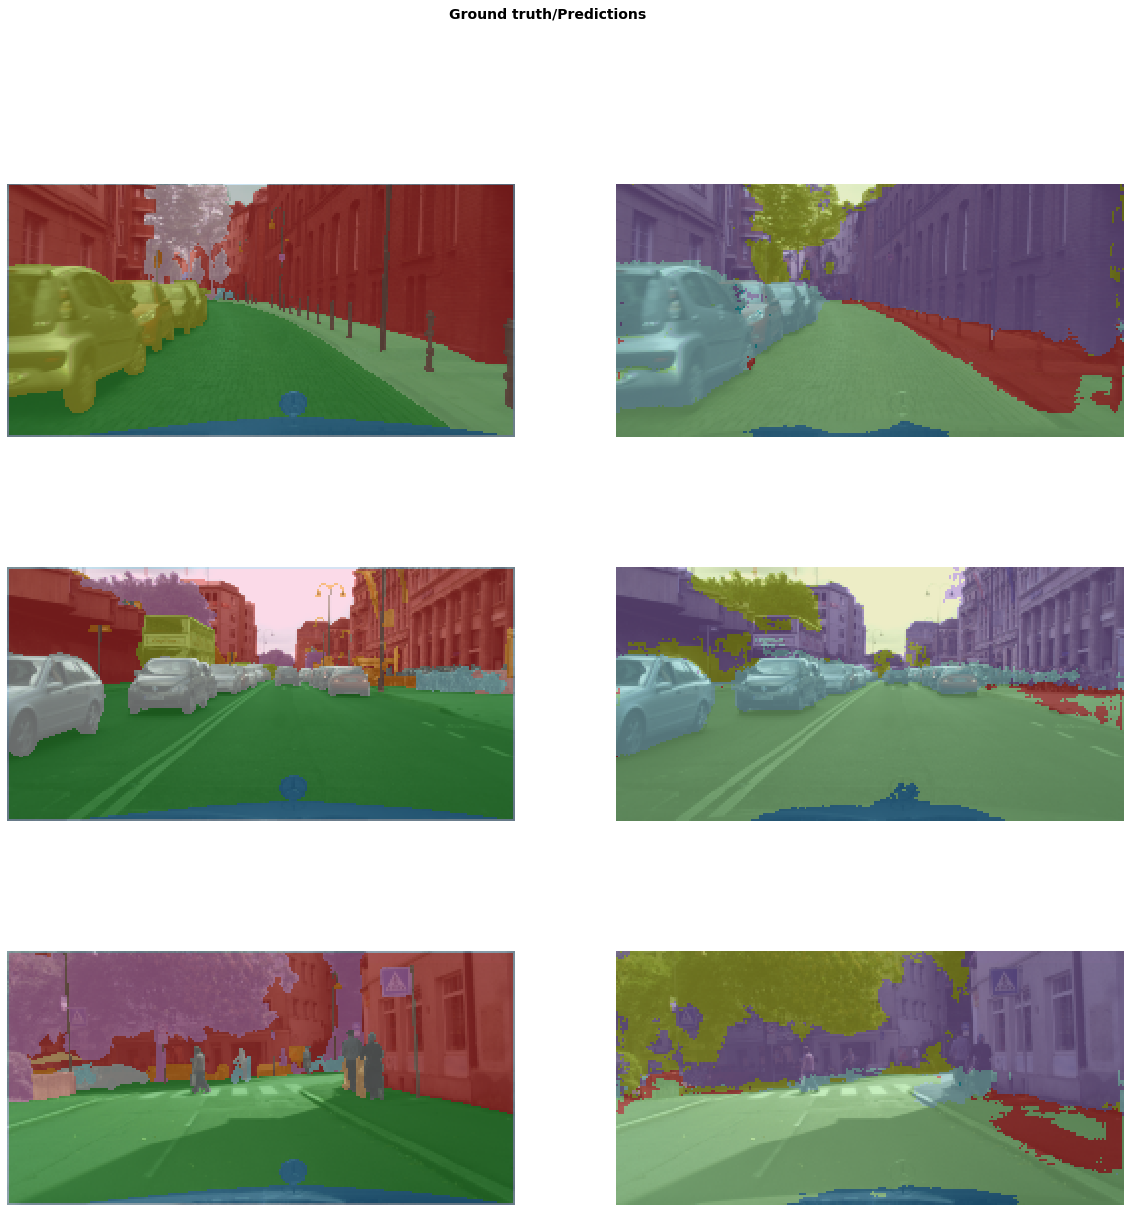

In [14]:
learn.show_results(rows=3, figsize=(20,20))

## test on competition dataset

In [15]:
test_dataset = get_databunch(test_dir)

In [18]:
learn.validate(test_dataset.valid_dl)

[1.0056338, tensor(0.7787)]